In [111]:
# Data Science
import numpy as np
import pandas as pd

# Visual
import matplotlib.pyplot as plt
import seaborn as sns

# plotly standard imports
from chart_studio import plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot
import plotly.express as px
# import plotly.io as pio

# Cufflinks wrapper on plotly
import cufflinks as cf

In [112]:
cf.go_offline()
# Setup Global Theme
cf.set_config_file(world_readable=True, theme='space', offline=True)

# Input Cell

In [113]:
demography = pd.read_excel('data/all.xlsx')

In [114]:
demography.drop_duplicates('ID', inplace=True)
demography = demography.drop('ID', axis=1)

# Weekly income + Quality + Favourite category

In [115]:
demography.groupby('Favourite category').agg({
    "Weekly income": ['mean', 'median'],
    "Preferred quality": ['mean', 'median'],
    "Name": 'size'}).style.background_gradient()

In [116]:
df2 = demography.pivot(columns="Favourite category", values="Weekly income")
df2.iplot(
    kind="box",
    yTitle="Weekly Income",
    title="Box Plot of Income and Cuisines",
)

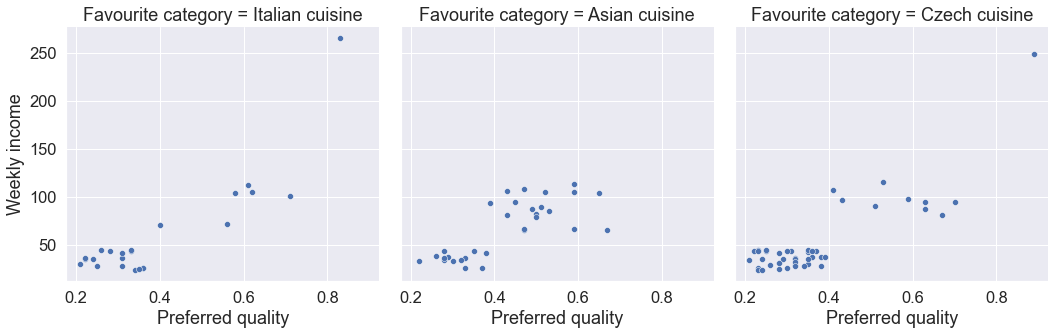

In [117]:
sns.set(font_scale = 1.5)
sns.relplot(data=demography,
            x='Preferred quality',
            y='Weekly income',
            col='Favourite category',
            kind='scatter',
            height=5,
            aspect=1);

# Stratification by Income

In [118]:
def income_stratification(x):
    if x <= 50:
        return 'low'
    elif 50 < x <= 150:
        return 'medium'
    return 'high'

demography['Stratification by income'] = demography['Weekly income'].apply(income_stratification)

## Visual Count by Income

In [119]:
stratification_graph = demography.groupby(by=['Favourite category', 'Stratification by income']).size().unstack()
stratification_graph.iplot(kind='bar', linecolor="black", title="Count by Income Category")

## Ad Type

In [120]:
medium = demography[demography['Stratification by income'] == 'medium']
medium_ads = medium.groupby(by=['Favourite category', 'Favourite ad type']).size().unstack()
medium_ads.iplot(kind='bar', linecolor="black", title="AD TYPE, Income Category=MEDIUM")

In [121]:
medium_asian = medium[medium['Favourite category'] == 'Asian cuisine']
medium_it = medium[medium['Favourite category'] == 'Czech cuisine']
medium_cz = medium[medium['Favourite category'] == 'Italian cuisine']

In [122]:
dfs = [medium_cz, medium_it, medium_asian]
for df in dfs:
    df.drop(columns=['Name', 'Gender', 'Favourite category',
                           'Stratification by income'], inplace=True)

In [123]:
fav_ad_asian = medium_asian.value_counts('Favourite ad type').index[0]
fav_ad_cz = medium_cz.value_counts('Favourite ad type').index[0]
fav_ad_it = medium_it.value_counts('Favourite ad type').index[0]

In [124]:
# medium_asian = medium_asian[medium_asian['Favourite ad type'] == fav_ad_asian]
# medium_cz = medium_asian[medium_asian['Favourite ad type'] == fav_ad_cz]
# medium_it = medium_asian[medium_asian['Favourite ad type'] == fav_ad_it]

In [125]:
medium_asian = medium_asian.describe(include='object').drop(['count', 'unique'])
medium_it = medium_it.describe(include='object').drop(['count', 'unique'])
medium_cz = medium_cz.describe(include='object').drop(['count', 'unique'])

## ASIAN

In [141]:
medium_asian.transpose()

,top,freq
Favourite ad type,promo stand big,8
MON 0-8h,Office district,8
MON 8-16h,Office district,5
MON 16-24h,Park,4
TUE 0-8h,Office district,6
TUE 8-16h,Office district,5
TUE 16-24h,Park,5
WED 0-8h,Office district,6
WED 8-16h,Park,4
WED 16-24h,Park,4


## ITALIAN

In [127]:
medium_it.transpose()

,top,freq
Favourite ad type,promo stand big,8
MON 0-8h,Office district,8
MON 8-16h,Office district,5
MON 16-24h,Park,4
TUE 0-8h,Office district,6
TUE 8-16h,Office district,5
TUE 16-24h,Park,5
WED 0-8h,Office district,6
WED 8-16h,Park,4
WED 16-24h,Park,4


## CZ

In [128]:
medium_cz.transpose()

,top,freq
Favourite ad type,promo stand big,8
MON 0-8h,Office district,8
MON 8-16h,Office district,5
MON 16-24h,Park,4
TUE 0-8h,Office district,6
TUE 8-16h,Office district,5
TUE 16-24h,Park,5
WED 0-8h,Office district,6
WED 8-16h,Park,4
WED 16-24h,Park,4
